# Rock-paper-scissors: fully connected network

## Instructions
1. Download this Jupyter notebook in your computer;2. Go to your folder that contains this notebook, and create another folder named *RPS*;3. Go to my shared [Google Drive folder](https://drive.google.com/drive/folders/1vVqezqGbrrmMi9TM4DwbJAPbsAm7XxY_?usp=sharing), download the folders named *Test* and *Train*, and uncompress them into your newly created *RPS* folder;4. Execute this notebook.

In [1]:
# IMPORTS :

import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torch.autograd import Variable
from torchvision import transforms
from torchvision.datasets import MNIST, ImageFolder, DatasetFolder
import matplotlib.pyplot as plt


SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

In [38]:
# Transformation :
t = transforms.Compose([transforms.Grayscale(), transforms.ToTensor(),])

train = ImageFolder('./RPS/Train/', transform = t)
test = ImageFolder('./RPS/Test/', transform = t)

print("Training data:", train)
print("\nTest data:", test)

# Create DataLoader
dataloader_args = dict(shuffle=True, batch_size=20,num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=20)
train_loader = dataloader.DataLoader(train, **dataloader_args)

dataloader_args = dict(shuffle=True, batch_size=len(test),num_workers=4, pin_memory=True)
test_loader = dataloader.DataLoader(test, **dataloader_args)

Training data: Dataset ImageFolder
    Number of datapoints: 202
    Root Location: ./PPC/Train2/
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

Test data: Dataset ImageFolder
    Number of datapoints: 20
    Root Location: ./PPC/Test2/
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None


In [39]:
# One hidden Layer NN
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(1024, 1000)
        self.fc2 = nn.Linear(1000, 10)

    def forward(self, x):
        x = x.view((-1, 1024))
        h = F.relu(self.fc(x))
        h = self.fc2(h)
        return F.log_softmax(h, dim=0)    
    
    
model = Model()
if cuda:
    model.cuda()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [43]:
EPOCHS = 20
losses = []

# Eval
data_iter = iter(train_loader)
evaluate_x, evaluate_y = data_iter.next()

if cuda:
    evaluate_x, evaluate_y = evaluate_x.cuda(), evaluate_y.cuda()
train_size = len(train_loader.dataset)
batch_size = (train_size / 20) if (cuda) else  (train_size / 20)

model.train()
for epoch in range(EPOCHS):
    for batch_idx, (data, target) in enumerate(train_loader):
        # Get Samples
        data, target = Variable(data), Variable(target)
        
        if cuda:
            data, target = data.cuda(), target.cuda()
        
        # Init
        optimizer.zero_grad()

        # Predict
        y_pred = model(data) 

         
        # Calculate loss
        loss = F.cross_entropy(y_pred, target)
        losses.append(loss.cpu().item())
        # Backpropagation
        loss.backward()
        optimizer.step()
        
        
        # Display
        if batch_idx % 100 == 1:
            print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch+1,
                EPOCHS,
                batch_idx * len(data), 
                train_size,
                100. * batch_idx / batch_size, 
                loss.cpu().item()), 
                end='')

    # display final evaluation for this epoch
    model.eval()
    output = model(evaluate_x)
    pred = output.data.max(1)[1]
    d = pred.eq(evaluate_y.data).cpu()
    accuracy = d.sum().item()/d.size()[0]
    
    print('\r Train Epoch: {}/{} [{}/{} ({:.0f}%)]\tLoss: {:.6f}\t Test Accuracy: {:.4f}%'.format(
        epoch+1,
        EPOCHS,
        train_size, 
        train_size,
        100. * batch_idx / batch_size, 
        loss.cpu().item(),
        accuracy*100,
        end=''))

 Train Epoch: 1/20 [202/202 (99%)]	Loss: 2.191867	 Test Accuracy: 65.0000%
 Train Epoch: 2/20 [202/202 (99%)]	Loss: 1.375263	 Test Accuracy: 75.0000%
 Train Epoch: 3/20 [202/202 (99%)]	Loss: 1.383309	 Test Accuracy: 45.0000%
 Train Epoch: 4/20 [202/202 (99%)]	Loss: 1.436583	 Test Accuracy: 60.0000%
 Train Epoch: 5/20 [202/202 (99%)]	Loss: 1.277647	 Test Accuracy: 70.0000%
 Train Epoch: 6/20 [202/202 (99%)]	Loss: 1.402017	 Test Accuracy: 50.0000%
 Train Epoch: 7/20 [202/202 (99%)]	Loss: 1.457348	 Test Accuracy: 75.0000%
 Train Epoch: 8/20 [202/202 (99%)]	Loss: 1.760037	 Test Accuracy: 60.0000%
 Train Epoch: 9/20 [202/202 (99%)]	Loss: 1.380450	 Test Accuracy: 85.0000%
 Train Epoch: 10/20 [202/202 (99%)]	Loss: 1.506277	 Test Accuracy: 70.0000%
 Train Epoch: 11/20 [202/202 (99%)]	Loss: 1.780278	 Test Accuracy: 20.0000%
 Train Epoch: 12/20 [202/202 (99%)]	Loss: 2.189299	 Test Accuracy: 90.0000%
 Train Epoch: 13/20 [202/202 (99%)]	Loss: 1.393154	 Test Accuracy: 60.0000%
 Train Epoch: 14/20 [

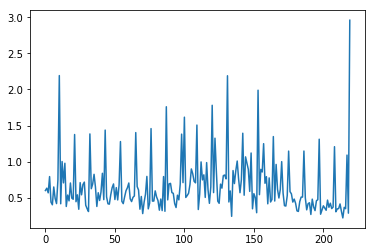

In [44]:
# Evolution des résultats de la fonction "loss" :
plt.plot(losses)

In [48]:
model.eval()
output = model(evaluate_x)
pred = output.data.max(1)[1]
d = pred.eq(evaluate_y.data).cpu()
accuracy = d.sum().item()/d.size()[0]
print('Accuracy:', accuracy*100, '%')

Accuracy: 75.0 %


à envoyer à : pboudier09@gmail.com